In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
income_data=pd.read_csv("./MedianHouseholdIncome2015.csv", encoding= 'unicode_escape')
education_data=pd.read_csv("./PercentOver25CompletedHighSchool.csv", encoding= 'unicode_escape')
police_kill_data=pd.read_csv("./PoliceKillingsUS.csv", encoding= 'unicode_escape')
race_data=pd.read_csv("./ShareRaceByCity.csv", encoding= 'unicode_escape')

In [28]:
print("-"*16+"income data"+"-"*16+"\n")
print(income_data.head())
print("\n")
print("-"*16+"eduacation_data"+"-"*16+"\n")
print("\n")
print(education_data.head())
print("-"*16+"police_kill_data"+"-"*16+"\n")
print("\n")
print(police_kill_data.head())
print("\n")
print("-"*16+"race_data"+"-"*16+"\n")
print(race_data.head())

----------------income data----------------

  Geographic Area             City Median Income
0              AL       Abanda CDP         11207
1              AL   Abbeville city         25615
2              AL  Adamsville city         42575
3              AL     Addison town         37083
4              AL       Akron town         21667


----------------eduacation_data----------------



  Geographic Area             City percent_completed_hs
0              AL       Abanda CDP                 21.2
1              AL   Abbeville city                 69.1
2              AL  Adamsville city                 78.9
3              AL     Addison town                 81.4
4              AL       Akron town                 68.6
----------------police_kill_data----------------



   id                name      date   manner_of_death       armed   age  \
0   3          Tim Elliot  02/01/15              shot         gun  53.0   
1   4    Lewis Lee Lembke  02/01/15              shot         gun  47.

In [29]:
print("-"*16+"income data"+"-"*16+"\n")
print(income_data.isnull().sum())
print("\n")
print("-"*16+"eduacation_data"+"-"*16+"\n")
print("\n")
print(education_data.isnull().sum())
print("-"*16+"police_kill_data"+"-"*16+"\n")
print("\n")
print(police_kill_data.isnull().sum())
print("\n")
print("-"*16+"race_data"+"-"*16+"\n")
print(race_data.isnull().sum())


----------------income data----------------

Geographic Area     0
City                0
Median Income      51
dtype: int64


----------------eduacation_data----------------



Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
----------------police_kill_data----------------



id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


----------------race_data----------------

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0

In [30]:
#remove null values

income_data=income_data.dropna().reset_index()
police_kill_data=police_kill_data.dropna().reset_index()

print("-"*16+"income data"+"-"*16+"\n")
print(income_data.isnull().sum())
print("\n")
print("-"*16+"eduacation_data"+"-"*16+"\n")
print("\n")
print(education_data.isnull().sum())
print("-"*16+"police_kill_data"+"-"*16+"\n")
print("\n")
print(police_kill_data.isnull().sum())
print("\n")
print("-"*16+"race_data"+"-"*16+"\n")
print(race_data.isnull().sum())

----------------income data----------------

index              0
Geographic Area    0
City               0
Median Income      0
dtype: int64


----------------eduacation_data----------------



Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
----------------police_kill_data----------------



index                      0
id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64


----------------race_data----------------

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_h

In [31]:
income_data['Median Income'].isnull().sum()
income_data=income_data[(income_data['Median Income']!='-' )& 
                        (income_data['Median Income']!='(X)') & 
                        (income_data['Median Income']!='2,500-')&
                        (income_data['Median Income']!='250,000+')
                       ]


I wanted to use groupby function and find the median of 'Median Income' column. Median Income column was having string datatype. To convert in to float data type, I removed '-',''(+)','2,500-','250,000+' data from the column.

In [32]:
income_data['Median Income']=income_data['Median Income'].astype(float)

In [33]:
area_group=income_data.groupby('Geographic Area')['Median Income'].median().reset_index(name ='I_COUNT').sort_values('I_COUNT')


Text(0.5, 1.0, 'Median household income of US states')

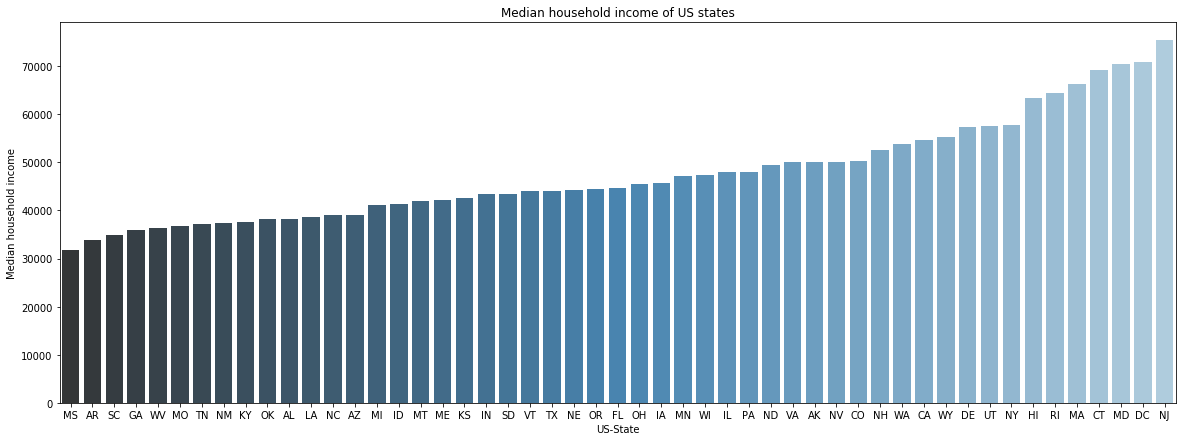

In [34]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x="Geographic Area", y="I_COUNT", data=area_group,palette="Blues_d")
plt.xlabel('US-State')
plt.ylabel('Median household income')
plt.title('Median household income of US states')

Above graph is illustrate the median house hold income of US state. Mississippi has lowest median income.

In [35]:

education_data=education_data[(education_data['percent_completed_hs']!='-')]
education_data['percent_completed_hs']=education_data['percent_completed_hs'].astype(float)
education_group=education_data.groupby('Geographic Area')['percent_completed_hs'].median().reset_index(name ='E_COUNT').sort_values('E_COUNT')
#education_group

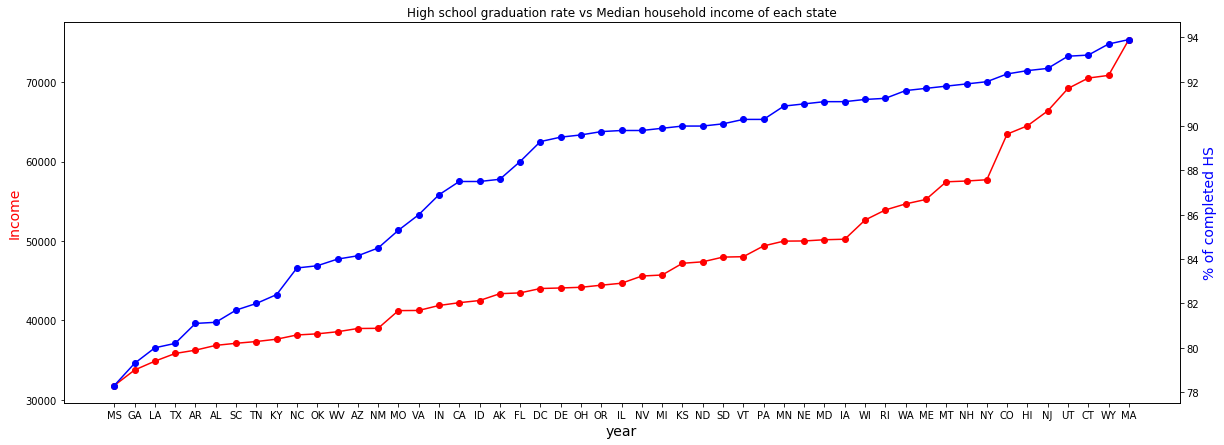

In [59]:

    # create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20,7))
# make a plot
ax.plot(area_group['Geographic Area'], area_group['I_COUNT'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Income",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(education_group['Geographic Area'], education_group["E_COUNT"],color="blue",marker="o")
ax2.set_ylabel("% of completed HS",color="blue",fontsize=14)
plt.title("High school graduation rate vs Median household income of each state")
plt.show()


Above graph is dual axis graph. Right side axis represent % of completed High school ofUS states, left side axis represents the median income for the US states. Here we can see that as % of complted highschool increases, income for that state is increasing too.

In [37]:
ID_group=police_kill_data.groupby('state')['id'].count().reset_index(name ='ID_COUNT').sort_values('ID_COUNT',ascending=False).head(30)

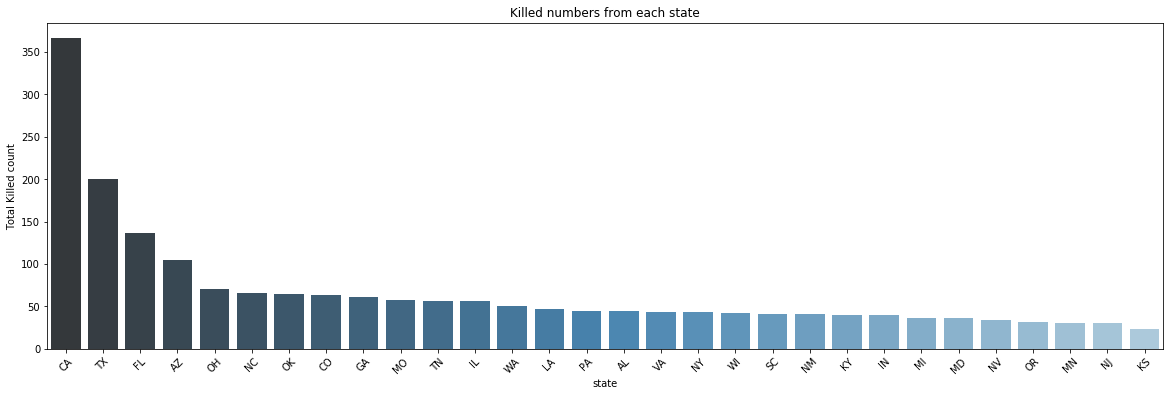

In [63]:
plt.figure(figsize=(20,6))
ax = sns.barplot(x="state", y="ID_COUNT", data=ID_group,palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.ylabel("Total Killed count")
plt.title("Killed numbers from each state")
plt.show()

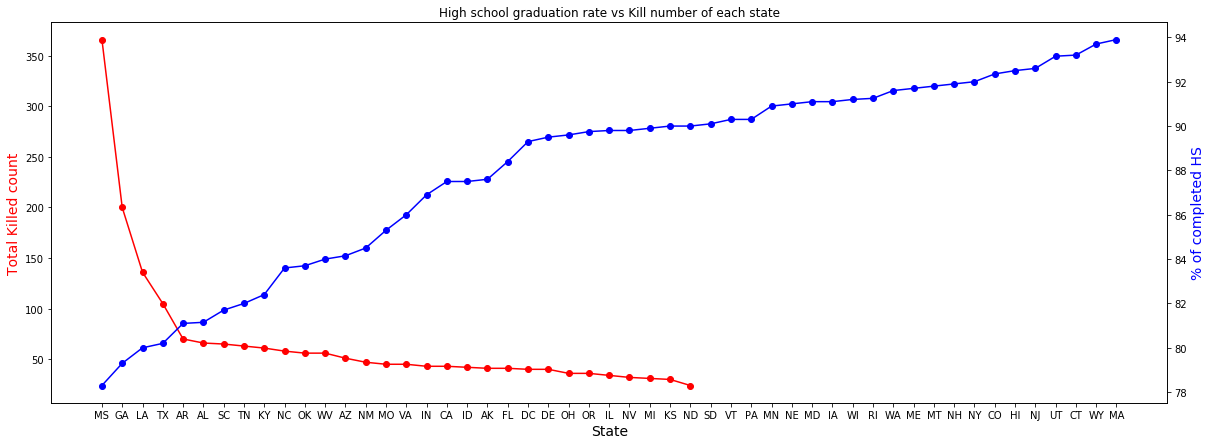

In [64]:
    # create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20,7))
# make a plot
ax.plot(ID_group['state'], ID_group['ID_COUNT'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("State",fontsize=14)
# set y-axis label
ax.set_ylabel("Total Killed count",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(education_group['Geographic Area'], education_group["E_COUNT"],color="blue",marker="o")
ax2.set_ylabel("% of completed HS",color="blue",fontsize=14)
plt.title("High school graduation rate vs Kill number of each state")
plt.show()

% of complted Hs increase, number of people die in shooting decrease. That means, the education level increase, crime level decreases.

In [40]:
bins = [15, 25, 35, 45, 55, 65, 75]
labels = ['5-14', '15-24', '25-34', '35-44', '45-54', '55+']
police_kill_data['age_group'] = pd.cut(police_kill_data.age, bins, labels = labels,include_lowest = True)



In [41]:
age_group_data=police_kill_data.groupby('age_group')['id'].count().reset_index(name ='AG_COUNT')


Text(0.5, 1.0, 'Police shooting on different age group')

<Figure size 1152x576 with 0 Axes>

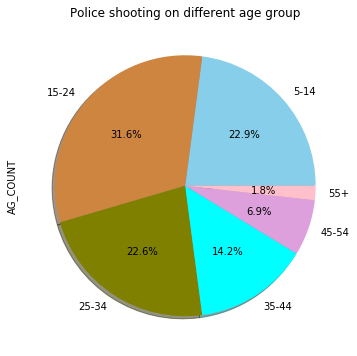

In [42]:
fig = plt.figure(figsize=(16,8)) 
colors_list = ['skyblue', 'peru','olive','cyan','plum','pink']
label=['5-14','15-24','25-34','35-44','45-54','55+']
age_group_data.plot(kind='pie',y='AG_COUNT',
        figsize=(15, 6),
        autopct='%1.1f%%', 
        startangle=0,    
        shadow=True,   
        labels=label,
        colors=colors_list,
                    legend=False
        )
plt.title("Police shooting on different age group") 


Mostly 15-24 age group was targeted.

In [43]:
race_group=police_kill_data.groupby('race')['id'].count().reset_index(name ='race_count')

In [44]:
race_group

,race,race_count
0,A,36
1,B,592
2,H,401
3,N,29
4,O,28
5,W,1168


Text(0.5, 1.0, 'Police shooting on different race group')

<Figure size 1152x576 with 0 Axes>

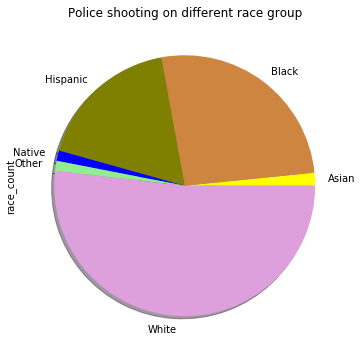

In [65]:
fig = plt.figure(figsize=(16,8)) 
colors_list = ['yellow', 'peru','olive','blue','lightgreen','plum']
label=['Asian','Black','Hispanic','Native','Other','White']
race_group.plot(kind='pie',y='race_count',
        figsize=(15, 6),
        startangle=0,    
        shadow=True,   
        labels=label,
        colors=colors_list,
        legend=False,        
        )
plt.title("Police shooting on different race group") 

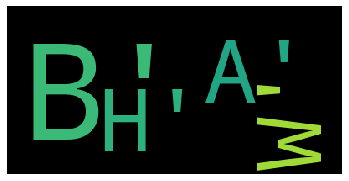

In [46]:
from wordcloud import WordCloud 
text =police_kill_data[police_kill_data['race']!=" "]['race'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [57]:

race_data=race_data[(race_data['share_white']!='(X)' )& 
                        (race_data['share_black']!='(X)') & 
                        (race_data['share_native_american']!='(X)')&
                        (race_data['share_asian']!='(X)')&
                        (race_data['share_hispanic']!='(X)')
                       ]

race_data['share_white']=race_data['share_white'].astype(float)
race_data['share_black']=race_data['share_black'].astype(float)
race_data['share_native_american']=race_data['share_native_american'].astype(float)
race_data['share_asian']=race_data['share_asian'].astype(float)
race_data['share_hispanic']=race_data['share_hispanic'].astype(float)
white=race_data.groupby('Geographic area')[['share_white','share_black','share_native_american','share_asian','share_hispanic']].median()


C:\Users\Saleha\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [23]:
# race_data[["share_white", "share_black"]].plot(kind="bar", stacked=True)

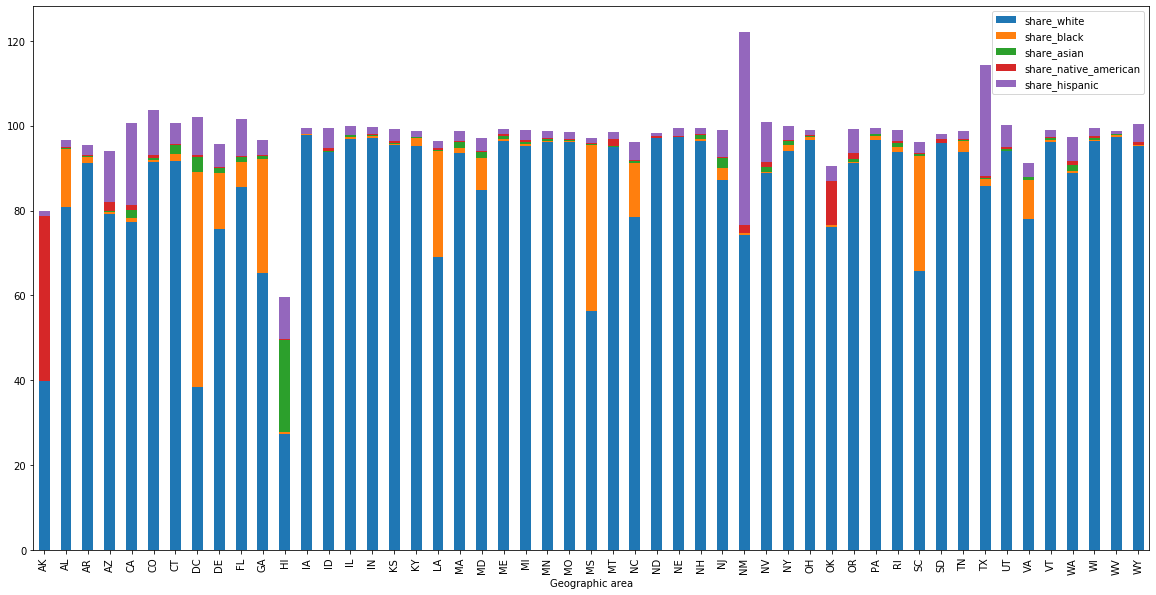

In [55]:

white[["share_white", "share_black",'share_asian','share_native_american','share_hispanic']].plot(kind="bar", stacked=True,figsize=(20,10))

